## Import dependencies

In [1]:
import torch
from torch import nn

from torchvision.transforms import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from pathlib import Path
from time import time
from tqdm.auto import tqdm

## Set up device-agnostic code

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.set_default_device(device)

In [3]:
device

'cuda'

## Load the data

In [4]:
# Setup the data directory path
data_path = Path('data/')
data_path

PosixPath('data')

In [5]:
# Get the training data
train_data = datasets.CIFAR10(root=data_path,
                              train=True,
                              transform=transforms.ToTensor(),
                              target_transform=None,
                              download=True)

test_data = datasets.CIFAR10(root=data_path,
                             train=False,
                             transform=transforms.ToTensor(),
                             target_transform=None,
                             download=True)

100%|██████████| 170498071/170498071 [00:04<00:00, 41457113.61it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [6]:
# Let's see what's in here
len(train_data), len(test_data)

(50000, 10000)

In [7]:
type(train_data)

torchvision.datasets.cifar.CIFAR10

In [8]:
train_data[0], type(train_data[0])

((tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
           [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
           [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
           ...,
           [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
           [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
           [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
  
          [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
           [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
           [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
           ...,
           [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
           [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
           [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
  
          [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
           [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
           [0.0824, 0.

In [9]:
train_data[0][0].shape

torch.Size([3, 32, 32])

In [10]:
train_data[0][0], type(train_data[0][0])

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [11]:
train_data[0][1], type(train_data[0][1])

(6, int)

In [12]:
train_data.class_to_idx, train_data.classes

({'airplane': 0,
  'automobile': 1,
  'bird': 2,
  'cat': 3,
  'deer': 4,
  'dog': 5,
  'frog': 6,
  'horse': 7,
  'ship': 8,
  'truck': 9},
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

In [13]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
class_dict = train_data.class_to_idx
class_dict

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [15]:
image, label = train_data[0]
print(f'Shape of image: {image.shape}')

Shape of image: torch.Size([3, 32, 32])


## Visualize what we're working with

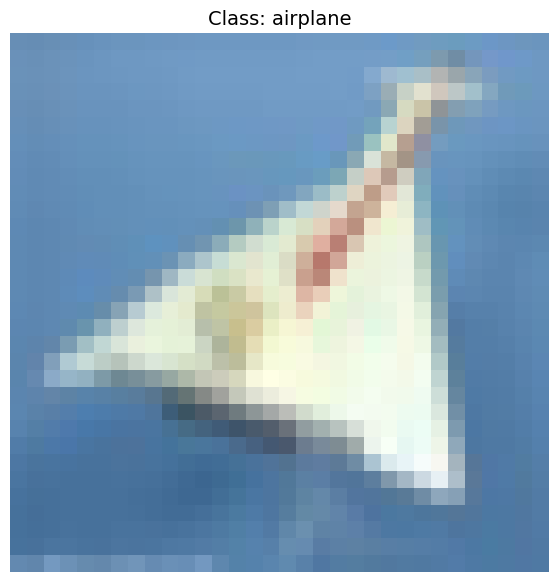

In [16]:
# torch.manual_seed(42)

random_idx = torch.randint(0, len(train_data), (1,)).item()
image, label = train_data[random_idx]
image_reshaped = image.permute(1, 2, 0)

plt.figure(figsize=(10, 7))
plt.imshow(image_reshaped)
plt.title(f'Class: {class_names[label]}', fontsize=14)
plt.axis(False)
plt.show()

## Prepare DataLoaders

In [30]:
BATCH_SIZE = 32
generator = torch.Generator(device)

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              generator=generator)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             generator=generator)

In [31]:
train_dataloader

In [32]:
# number of batches
len(train_dataloader)

1563

In [33]:
len(train_dataloader) * BATCH_SIZE

50016

In [34]:
len(train_data) / BATCH_SIZE

1562.5

In [35]:
# Let's see how a dataloader works
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

In [36]:
image_batch.device, label_batch.shape

(device(type='cpu'), torch.Size([32]))

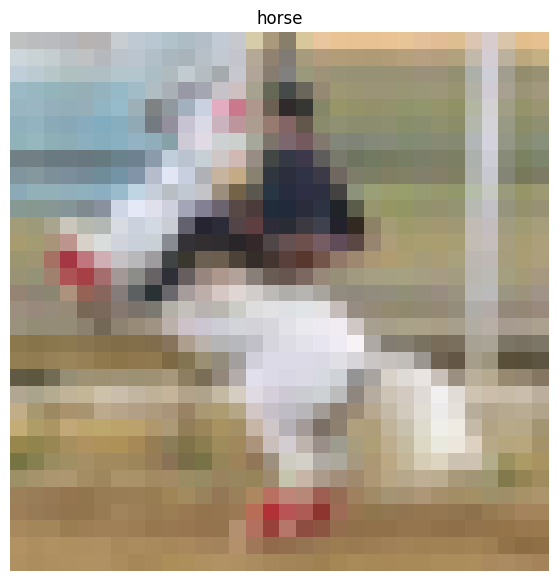

In [37]:
# torch.manual_seed(42)

random_idx = torch.randint(0, len(image_batch), (1,)).item()

image, label = image_batch[random_idx], label_batch[random_idx]

plt.figure(figsize=(10, 7))
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False)
plt.show()

## Let's build a baseline model (model_0)

In [38]:
class CIFAR10ModelV0(nn.Module):
  def __init__(self, input_shape: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=8),
        nn.Linear(in_features=8, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [50]:
model_0 = CIFAR10ModelV0(input_shape=(3*32*32),
                         output_shape=10).to(device)
model_0

CIFAR10ModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

## Let's train our data on the baseline model

In [46]:
def accuracy_fn(y_true, y_pred):
  correct = torch.sum(torch.eq(y_true, y_pred))
  total = len(y_true)

  return correct / total

In [47]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=1e-3)

In [51]:
epochs = 3

start_time = time()

for epoch in tqdm(range(epochs)):
  # Training
  train_loss, train_acc = 0, 0
  test_loss, test_acc = 0, 0

  for X, y in train_dataloader:
    X, y = X.to(device), y.to(device)
    
    model_0.train()
    y_pred_logits = model_0(X)

    loss = loss_fn(y_pred_logits, y)
    train_loss += loss

    acc = accuracy_fn(y_true=y,
                      y_pred=y_pred_logits.argmax(axis=1))
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  # Testing
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
    
      y_pred_logits_test = model_0(X)

      test_loss += loss_fn(y_pred_logits_test, y)

      test_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred_logits_test.argmax(axis=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f'Train loss: {train_loss} | Train accuracy: {train_acc} | Test loss: {test_loss} | Test accuracy: {test_acc}')

end_time = time()

print(f'Total training time = {end_time - start_time} seconds.')

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 2.331432580947876 | Train accuracy: 0.10000799596309662 | Test loss: 2.332022190093994 | Test accuracy: 0.09984025359153748
Train loss: 2.3314199447631836 | Train accuracy: 0.10000799596309662 | Test loss: 2.332022190093994 | Test accuracy: 0.09984025359153748
Train loss: 2.331432580947876 | Train accuracy: 0.10000799596309662 | Test loss: 2.332022190093994 | Test accuracy: 0.09984025359153748
Total training time = 38.19152522087097 seconds.


In [54]:
def train(model: torch.nn.Module,
          dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn=accuracy_fn,
          device: torch.device = device):
  torch.set_default_device(device)

  train_loss, train_acc = 0, 0

  model.train()
  for X, y in dataloader:
    X, y = X.to(device), y.to(device)
    
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    acc = accuracy_fn(y_true=y,
                      y_pred=y_pred.argmax(axis=1))
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

def test(model: torch.nn.Module,
         dataloader: torch.utils.data.DataLoader,
         loss_fn: torch.nn.Module,
         accuracy_fn=accuracy_fn,
         device: torch.device = device):
  torch.set_default_device(device)

  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
    
      y_pred = model(X)

      test_loss += loss_fn(y_pred, y)

      test_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(axis=1))

    test_acc /= len(dataloader)
    test_loss /= len(dataloader)

  return train_loss, train_acc

In [55]:
epochs = 10

for epoch in tqdm(range(epochs)):
  train_loss, train_acc = train(model=model_0,
                                dataloader=train_dataloader,
                                loss_fn=loss_fn,
                                optimizer=optimizer,
                                accuracy_fn=accuracy_fn,
                                device=device)
  test_loss, test_acc = test(model=model_0,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  print(f'Train loss: {train_loss} | Train accuracy: {train_acc} | Test loss: {test_loss} | Test accuracy: {test_acc}')

  0%|          | 0/10 [00:00<?, ?it/s]

Train loss: 2.331416606903076 | Train accuracy: 0.10002799332141876 | Test loss: 2.331416606903076 | Test accuracy: 0.10002799332141876
Train loss: 2.3314239978790283 | Train accuracy: 0.10002799332141876 | Test loss: 2.3314239978790283 | Test accuracy: 0.10002799332141876
Train loss: 2.331437110900879 | Train accuracy: 0.10002799332141876 | Test loss: 2.331437110900879 | Test accuracy: 0.10002799332141876
Train loss: 2.331451177597046 | Train accuracy: 0.10000799596309662 | Test loss: 2.331451177597046 | Test accuracy: 0.10000799596309662
Train loss: 2.3314285278320312 | Train accuracy: 0.10000799596309662 | Test loss: 2.3314285278320312 | Test accuracy: 0.10000799596309662
Train loss: 2.3314125537872314 | Train accuracy: 0.10002799332141876 | Test loss: 2.3314125537872314 | Test accuracy: 0.10002799332141876
Train loss: 2.3314290046691895 | Train accuracy: 0.10002799332141876 | Test loss: 2.3314290046691895 | Test accuracy: 0.10002799332141876
Train loss: 2.331415891647339 | Train ac

In [94]:
from typing import List

def fit(model: torch.nn.Module,
        epochs: int,
        train_dataloader: torch.utils.data.DataLoader,
        test_dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn,
        device: torch.device):

  train_losses = []
  train_accuracies = []
  test_losses = []
  test_accuracies = []

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train(model=model,
                                  dataloader=train_dataloader,
                                  loss_fn=loss_fn,
                                  optimizer=optimizer,
                                  accuracy_fn=accuracy_fn,
                                  device=device)
    train_losses.append(train_loss.detach().cpu().numpy())
    train_accuracies.append(train_acc.detach().cpu().numpy())

    test_loss, test_acc = test(model=model,
                               dataloader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn,
                               device=device)

    test_losses.append(test_loss.detach().cpu().numpy())
    test_accuracies.append(test_acc.detach().cpu().numpy())

    print(f'Train loss: {train_loss} | Train accuracy: {train_acc} | Test loss: {test_loss} | Test accuracy: {test_acc}')

  return train_losses, train_accuracies, test_losses, test_accuracies

def plot_loss_curves(train_losses: List[float],
                     test_losses: List[float]):
    
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 12))

  axs[0].plot(range(len(train_losses)), train_losses, color='blue')
  axs[0].set_title('Training Loss Curve')
  axs[0].set_xlabel('Number of Epochs')
  axs[0].set_ylabel('Loss')

  axs[1].plot(range(len(test_losses)), test_losses, color='orange')
  axs[1].set_title('Test Loss Curve')
  axs[1].set_xlabel('Number of Epochs')
  axs[1].set_ylabel('Loss')

def plot_accuracy_curves(train_accuracies: List[float],
                         test_accuracies: List[float]):
    
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 12))

  axs[0].plot(range(len(train_accuracies)), train_accuracies, color='blue')
  axs[0].set_title('Training Accuracy Curve')
  axs[0].set_xlabel('Number of Epochs')
  axs[0].set_ylabel('Accuracy')

  axs[1].plot(range(len(test_accuracies)), test_accuracies, color='orange')
  axs[1].set_title('Test Accuracy Curve')
  axs[1].set_xlabel('Number of Epochs')
  axs[1].set_ylabel('Accuracy')

In [91]:
model_0 = CIFAR10ModelV0(input_shape=(3*32*32),
                         output_shape=10)

train_losses, train_accuracies, test_losses, test_accuracies = fit(model=model_0,
                                                                   epochs=3,
                                                                   train_dataloader=train_dataloader,
                                                                   test_dataloader=test_dataloader,
                                                                   loss_fn=loss_fn,
                                                                   optimizer=optimizer,
                                                                   accuracy_fn=accuracy_fn,
                                                                   device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 2.309746503829956 | Train accuracy: 0.12859885394573212 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876
Train loss: 2.3097589015960693 | Train accuracy: 0.12855885922908783 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876
Train loss: 2.3097829818725586 | Train accuracy: 0.12853886187076569 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876


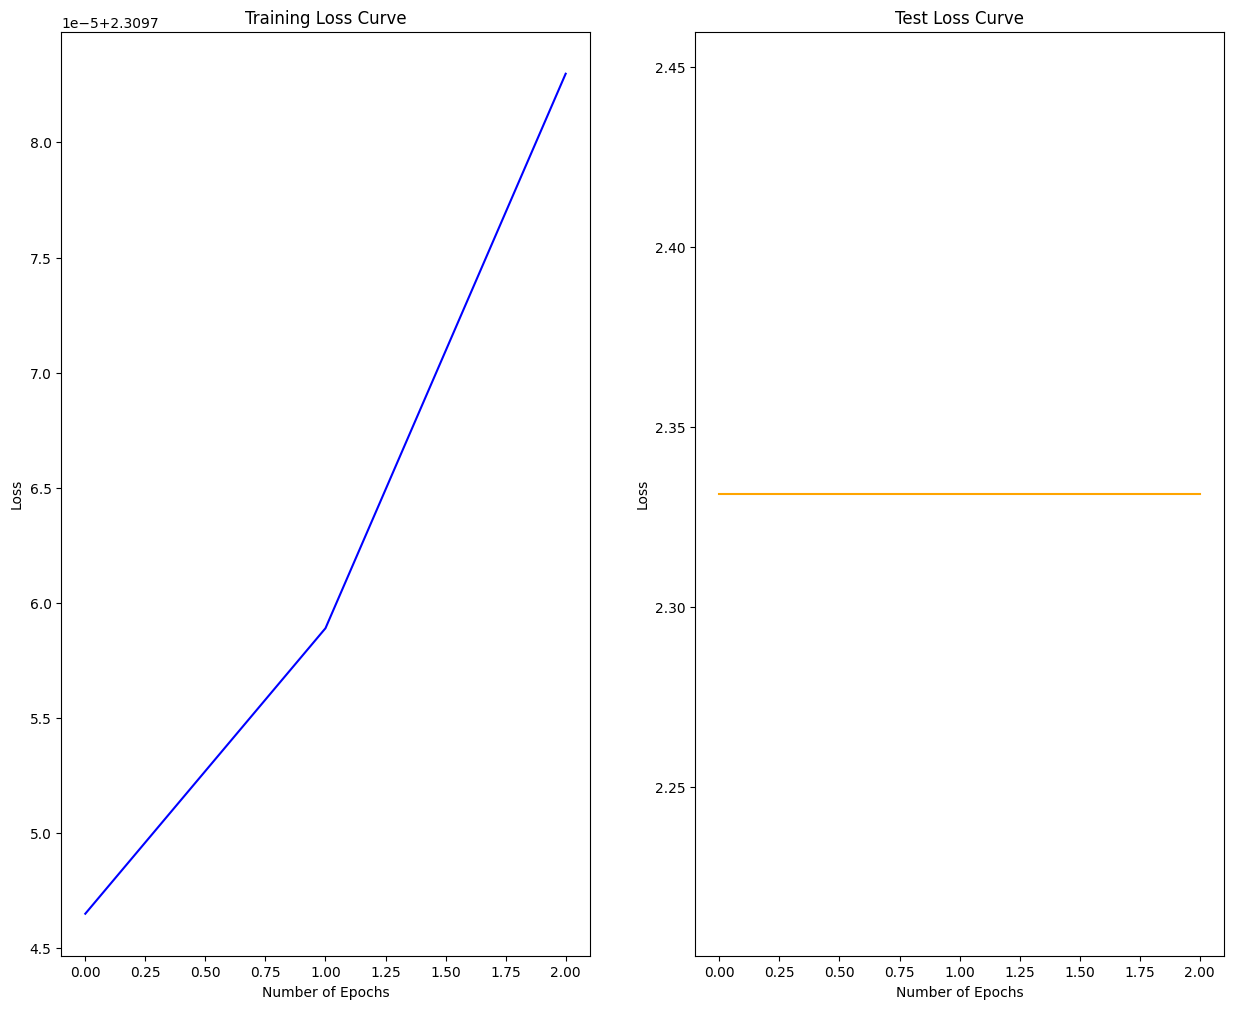

In [95]:
plot_loss_curves(train_losses, test_losses)

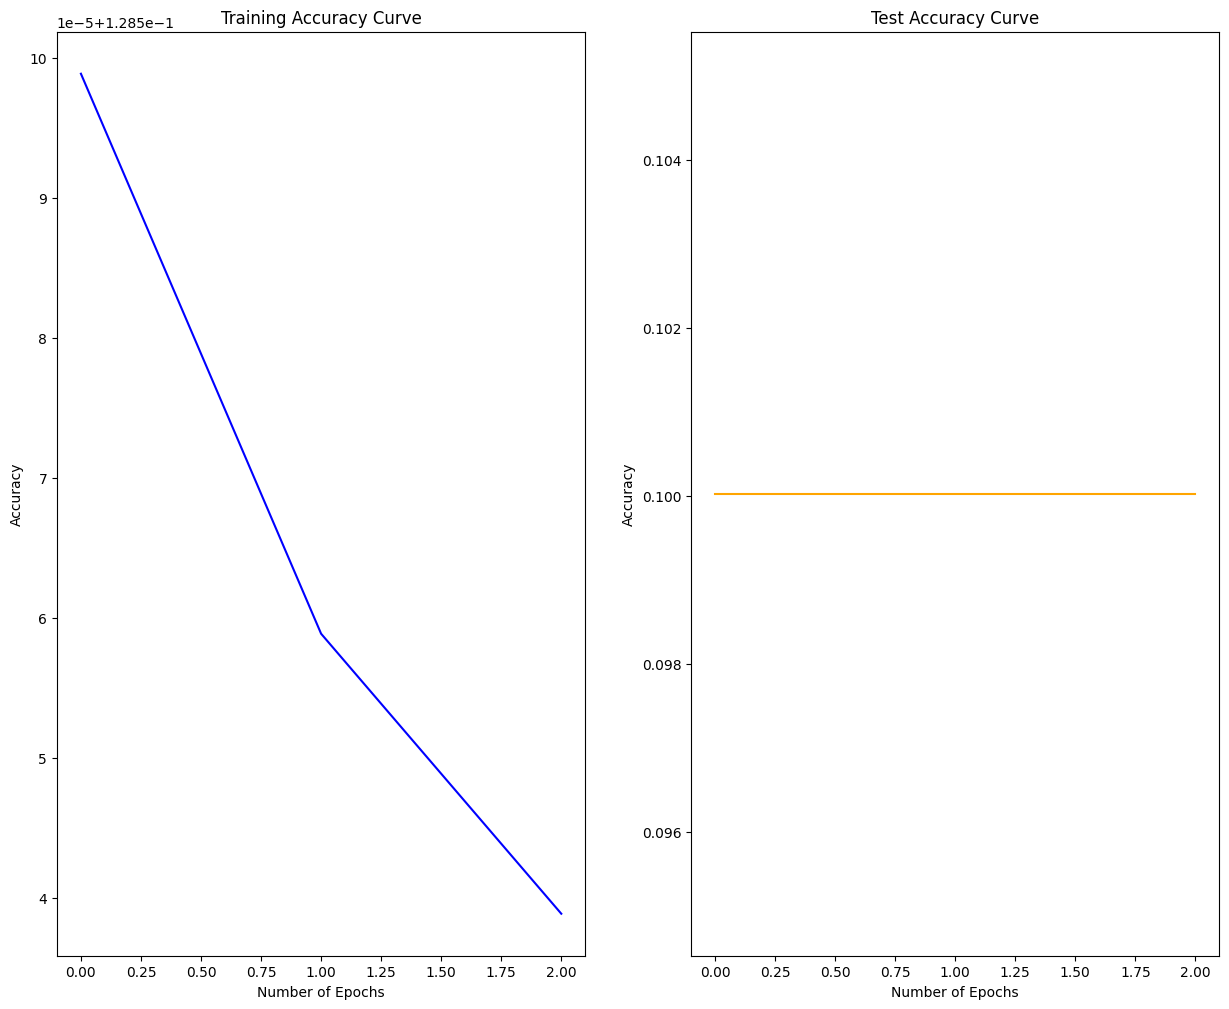

In [96]:
plot_accuracy_curves(train_accuracies, test_accuracies)

## Build a model which can learn non-linearity

In [97]:
class CIFAR10ModelV1(nn.Module):
  def __init__(self, input_shape: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, X: torch.Tensor):
    return self.layer_stack(X)

In [98]:
model_1 = CIFAR10ModelV1(input_shape=(3*32*32), output_shape=len(class_names))

train_losses, train_accuracies, test_losses, test_accuracies = fit(model=model_1,
                                                                   epochs=50,
                                                                   train_dataloader=train_dataloader,
                                                                   test_dataloader=test_dataloader,
                                                                   loss_fn=loss_fn,
                                                                   optimizer=optimizer,
                                                                   accuracy_fn=accuracy_fn,
                                                                   device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

Train loss: 2.3105530738830566 | Train accuracy: 0.10000799596309662 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876
Train loss: 2.310532569885254 | Train accuracy: 0.10004798322916031 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876
Train loss: 2.310544013977051 | Train accuracy: 0.09998800605535507 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876
Train loss: 2.310530424118042 | Train accuracy: 0.10002799332141876 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876
Train loss: 2.3105385303497314 | Train accuracy: 0.10000799596309662 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876
Train loss: 2.310551166534424 | Train accuracy: 0.10002799332141876 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876
Train loss: 2.3105411529541016 | Train accuracy: 0.10002799332141876 | Test loss: 2.3314380645751953 | Test accuracy: 0.10002799332141876
Train loss: 2.310542345046997 | Train 

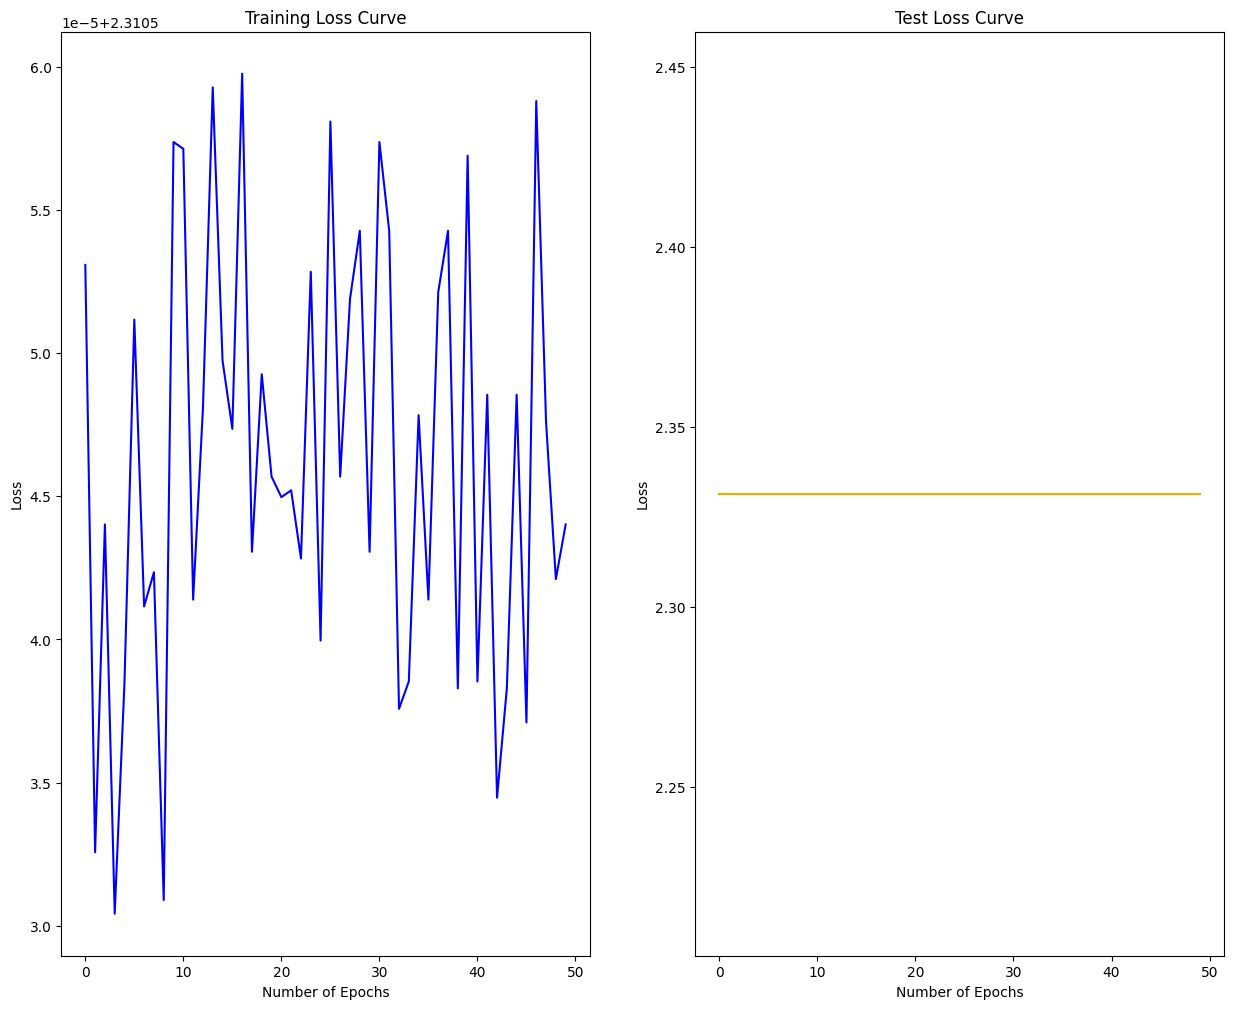

In [99]:
plot_loss_curves(train_losses, test_losses)

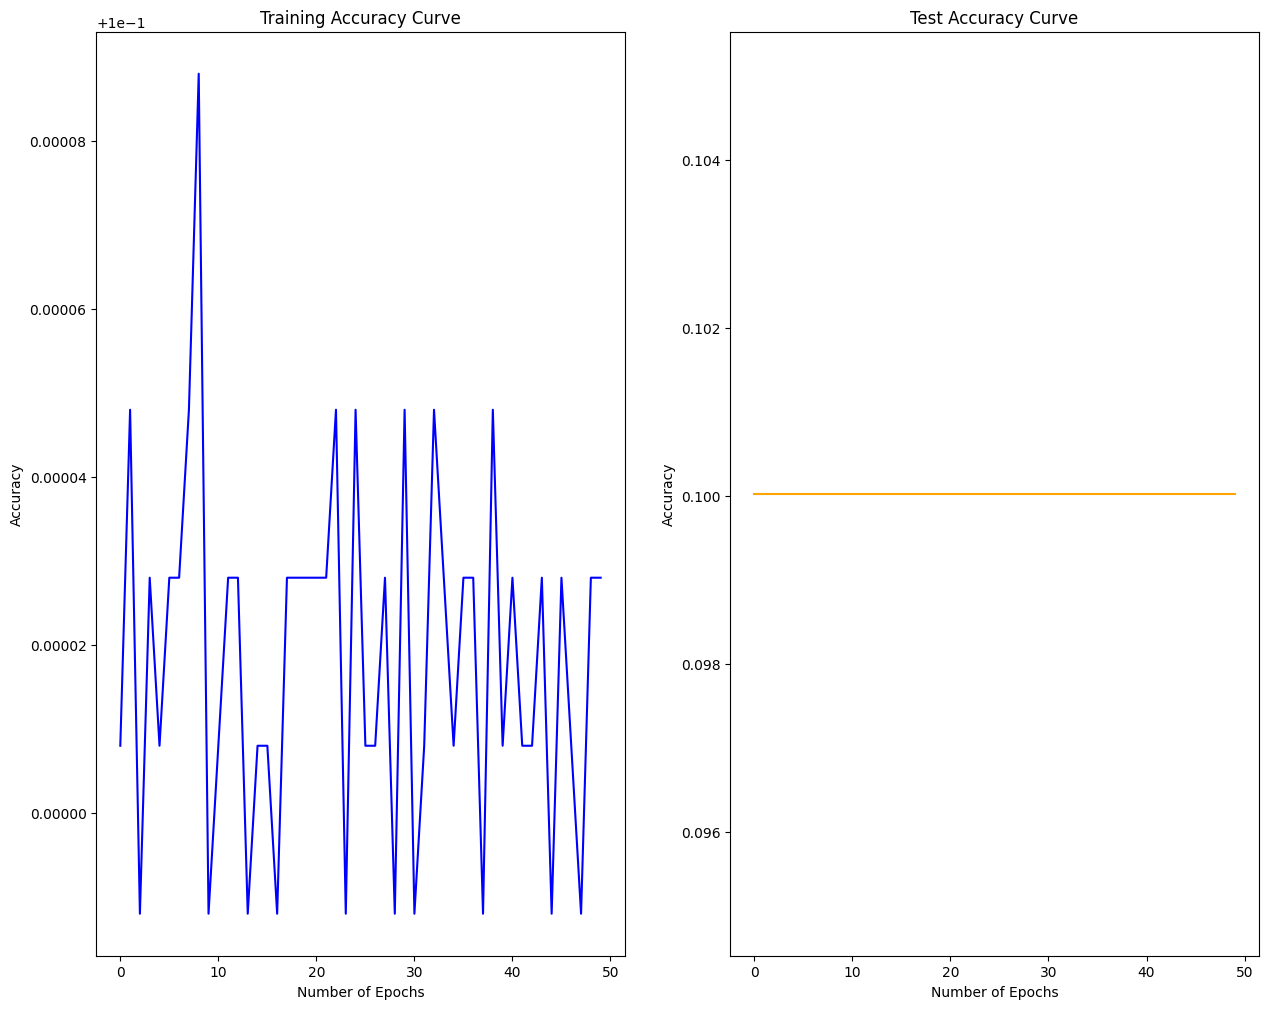

In [100]:
plot_accuracy_curves(train_accuracies, test_accuracies)

The model is not learning at all, I need to introduce convolutional blocks for it to learn the patterns.